In [1]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
SEED=123
FILE_NAME = "dataset_week_1.csv"

In [3]:
data = pd.read_csv(FILE_NAME)

In [4]:
data.shape

(10008, 785)

In [5]:
# The labels for images.
y = data["label"]

In [6]:
# Drop 'label' column.
X = data.drop(columns= ["label"])

In [7]:
# Normalize the data
X = X.astype('float32') / 255.0

In [8]:
X = X.values # Convert the features (pixel values) to numpy array to feed into the supervised learning model.
y = y.values # Convert the labels to numpy array to feed into the supervised learning model.

In [9]:
# Split data into test and train to build the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=SEED)


Text(0.5, 1.0, '0')

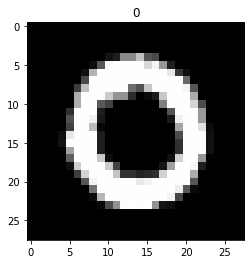

In [10]:
i=1
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

In [11]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=SEED,
                            max_depth=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=123)

In [12]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8771649347188916, 0.8569144684252598)

Text(0.5, 1.0, '1')

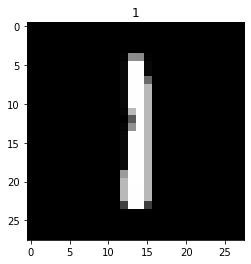

In [13]:
i=2
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

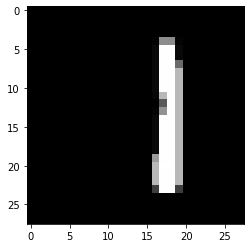

In [14]:
img1 = np.zeros((28,28))
img1[:,4:] = img[:,0:24]
plt.imshow(img1, cmap='gray')

In [15]:
clf.predict_proba(X[i].reshape(1, -1)).round(2)

array([[0.  , 0.76, 0.04, 0.04, 0.01, 0.03, 0.02, 0.03, 0.04, 0.02]])

In [16]:
clf.predict_proba(img1.flatten().reshape(1,-1)).round(2)

array([[0.06, 0.05, 0.1 , 0.1 , 0.1 , 0.06, 0.04, 0.39, 0.03, 0.07]])

In [17]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [18]:

import tensorflow as tf
import tensorflow.keras.layers as L


In [19]:
tf.random.set_seed(
    123
)
np.random.seed(123)
tf.compat.v1.set_random_seed(123)

In [20]:
X.shape

(10008, 784)

In [21]:
X = X.reshape(10008,28,28,1)

In [22]:

model1 = tf.keras.models.Sequential()
model1.add(L.Conv2D(3, (3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model1.add(L.MaxPooling2D((2, 2)))
model1.add(L.Flatten())
model1.add(L.Dense(10, activation="softmax"))
#model.add(L.Dense(256, activation="relu"))
model1.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])
model1.fit(X, y, epochs=5, validation_split=0.3)


Epoch 1/5
219/219 [==============================] - 2s 7ms/step - loss: 1.5938 - accuracy: 0.5290 - val_loss: 0.4902 - val_accuracy: 0.8581
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.4208 - accuracy: 0.8774 - val_loss: 0.3665 - val_accuracy: 0.8888
Epoch 3/5
219/219 [==============================] - 1s 4ms/step - loss: 0.3296 - accuracy: 0.9015 - val_loss: 0.3103 - val_accuracy: 0.9081
Epoch 4/5
219/219 [==============================] - 1s 5ms/step - loss: 0.2633 - accuracy: 0.9195 - val_loss: 0.2849 - val_accuracy: 0.9167
Epoch 5/5
219/219 [==============================] - 1s 6ms/step - loss: 0.2457 - accuracy: 0.9229 - val_loss: 0.2731 - val_accuracy: 0.9167


In [23]:
model3 = tf.keras.models.Sequential()

model3.add(L.Conv2D(3, (3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model3.add(L.MaxPooling2D((2, 2)))

model3.add(L.Conv2D(6, (3, 3), padding='same', activation="relu"))
model3.add(L.MaxPooling2D((2, 2)))

model3.add(L.Conv2D(9, (3, 3), padding='same', activation="relu"))
model3.add(L.MaxPooling2D((2, 2)))

model3.add(L.Flatten())
model3.add(L.Dense(10, activation="softmax"))
#model.add(L.Dense(256, activation="relu"))
model3.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])
model3.fit(X, y, epochs=6, validation_split=0.3)

Epoch 1/6
219/219 [==============================] - 2s 8ms/step - loss: 2.0063 - accuracy: 0.3418 - val_loss: 0.5943 - val_accuracy: 0.8159
Epoch 2/6
219/219 [==============================] - 1s 6ms/step - loss: 0.4844 - accuracy: 0.8553 - val_loss: 0.3893 - val_accuracy: 0.8711
Epoch 3/6
219/219 [==============================] - 1s 6ms/step - loss: 0.3362 - accuracy: 0.8930 - val_loss: 0.3051 - val_accuracy: 0.8991
Epoch 4/6
219/219 [==============================] - 2s 7ms/step - loss: 0.2594 - accuracy: 0.9171 - val_loss: 0.2799 - val_accuracy: 0.9138
Epoch 5/6
219/219 [==============================] - 2s 7ms/step - loss: 0.2355 - accuracy: 0.9250 - val_loss: 0.2445 - val_accuracy: 0.9234
Epoch 6/6
219/219 [==============================] - 2s 9ms/step - loss: 0.2061 - accuracy: 0.9348 - val_loss: 0.2616 - val_accuracy: 0.9128


In [24]:
model3.fit(X, y, epochs=3, validation_split=0.3)

Epoch 1/3
219/219 [==============================] - 2s 9ms/step - loss: 0.1905 - accuracy: 0.9409 - val_loss: 0.2138 - val_accuracy: 0.9291
Epoch 2/3
219/219 [==============================] - 2s 9ms/step - loss: 0.1765 - accuracy: 0.9446 - val_loss: 0.2095 - val_accuracy: 0.9327
Epoch 3/3
219/219 [==============================] - 2s 8ms/step - loss: 0.1706 - accuracy: 0.9465 - val_loss: 0.1926 - val_accuracy: 0.9351


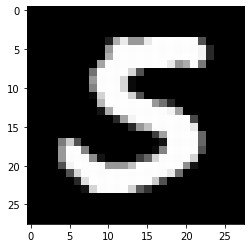

In [30]:
img = X[99] #99
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')

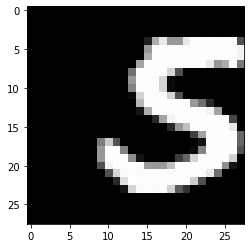

In [46]:
img1 = np.zeros((28,28))
shift = 5
img1[:,shift:] = img[:,0:28-shift]
plt.imshow(img1, cmap='gray')

In [47]:
num=5
for shift in range(0,10):
    img1 = np.zeros((28,28))
    img1[:,shift:] = img[:,0:28-shift]
    print(shift, end="\t")
    
    print(clf.predict_proba(img1.flatten().reshape(1,-1))[0][num], end="\t")
    print(model1.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
    print(model3.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
    
    print("\n")

0	0.439509176384488	0.98839986	0.99992	

1	0.3779899560549233	0.9982679	0.9999453	

2	0.35395343539758556	0.9985701	0.99991465	

3	0.24708996023998156	0.9948578	0.9993162	

4	0.1597744536637088	0.98052466	0.9926595	

5	0.07845693421610392	0.92024404	0.95831484	

6	0.07000624250675076	0.28812984	0.49437428	

7	0.07742677129442849	0.08120656	0.09003366	

8	0.06585210090298917	0.08547819	0.009533995	

9	0.09103546863677113	0.2081422	0.0005455983	



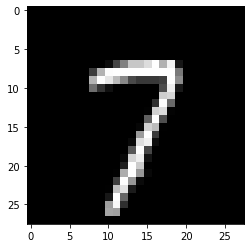

In [59]:
plt.imshow(img, cmap='gray')

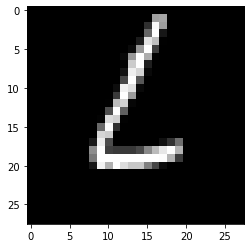

In [58]:
img = X[18]
img1 = np.rot90(img,2)
plt.imshow(img1, cmap='gray')

0.05083991383609869	2.3370953e-06	2.8590465e-08	

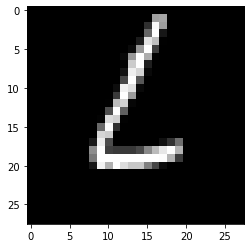

In [60]:
num=7
img1 = np.rot90(img,2)
plt.imshow(img1, cmap='gray')
print(clf.predict_proba(img1.flatten().reshape(1,-1))[0][num], end="\t")
print(model1.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
print(model3.predict(img1.reshape(1,28,28,1))[0][num], end="\t")
